In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Traceback (most recent call last):
        File "/Users/shounak/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pkg_resources/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
        File "/Users/shounak/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pkg_resources/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/Users/shounak/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pkg_resources/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/Users/shounak/miniconda3/e

In [4]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bayesian-optimization         1.4.2
beautifulsoup4                4.11.2
bleach                        6.0.0
boto3                         1.26.69
botocore                      1.29.69
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            2.1.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm   

In [3]:
!pip install opencv-python 

  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)


In [39]:
# Remove bad Image

In [30]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [32]:
len(gpus)

1

In [33]:
#Avoid OOM error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [34]:
import cv2
import imghdr

In [35]:
data_dir = 'data'

In [36]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [37]:
image_exts = ['jpeg','jpg','bmp','png']

In [38]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [39]:
for image_class in os.listdir(data_dir):
    if not image_class.startswith('.'):
        print(image_class)

happy
sad


In [21]:
# Condition for Removing Bad Data

In [40]:
for image_class in os.listdir(data_dir):
    if not image_class.startswith('.'):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in exts list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with Image {}'.format(image_path))

In [38]:
# Load the Data

In [62]:
import numpy as np

In [49]:
# Create a Data PipeLine

In [167]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 199 files belonging to 2 classes.


In [78]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
# Access the Data PipeLine

In [168]:
data_iterator = data.as_numpy_iterator()

2023-08-15 23:03:07.312283: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-15 23:03:07.312920: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]


In [51]:
# Looping throughjt the Data PipeLine

In [169]:
# Get another batch
batch = data_iterator.next()

In [170]:
batch[0].shape

(32, 256, 256, 3)

In [171]:
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

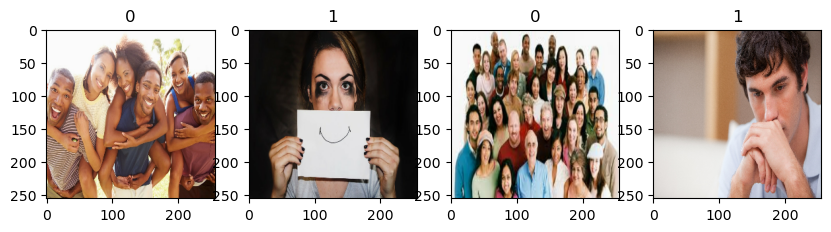

In [172]:
fig, ax = plt.subplots(ncols= 4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [84]:
# Pre Processing the Data

In [96]:
# Scale Data

In [174]:
data = data.map(lambda x,y: (x/255,y))

In [175]:
scaled_iterator = data.as_numpy_iterator()

2023-08-15 23:03:28.896134: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-15 23:03:28.896705: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]


In [176]:
batch = scaled_iterator.next()

In [177]:
batch[0].max() 

1.0

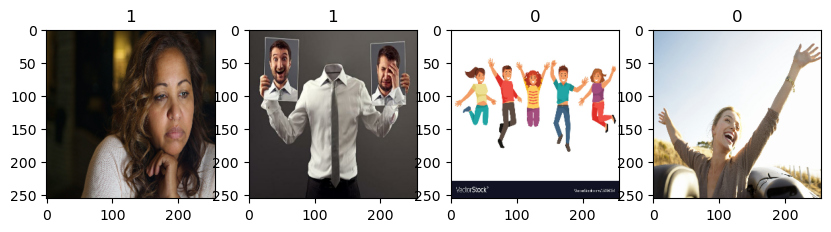

In [178]:
fig, ax = plt.subplots(ncols= 4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [121]:
# Split Data

In [179]:
len(data)

7

In [133]:
# Training and Evaluating our Deep Learning Model

In [180]:
train_size = int(len(data)*.7) 
val_size = int(len(data)*.2)+1 
test_size = int(len(data)*.1)+1

In [153]:
# how many batches we are allocating partition

In [181]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [182]:
len(train)

4

In [154]:
# Deep Model

In [155]:
# Building the Model

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [185]:
model = Sequential()

In [187]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [188]:
model.compile('adam', loss =tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9

In [190]:
# Training the Model

In [191]:
logdir = 'logs'

In [192]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [193]:
# model.fit is the training component
# model.predict is the Prediction componenet

In [195]:
hist = model.fit(train, epochs= 20, validation_data =val, callbacks = [tensorboard_callback] )

Epoch 1/20


2023-08-16 00:04:41.432805: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:04:41.433086: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:04:42.290853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.9598 - accuracy: 0.5625

2023-08-16 00:04:49.579884: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:04:49.580188: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:04:49.718730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 11s 1s/step - loss: 0.9598 - accuracy: 0.5625 - val_loss: 0.8067 - val_accuracy: 0.4219
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.7660 - accuracy: 0.5234 - val_loss: 0.7176 - val_accuracy: 0.6094
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6301 - accuracy: 0.6250 - val_loss: 0.5976 - val_accuracy: 0.7031
Epoch 4/20
4/4 [==============================] - 5s 943ms/step - loss: 0.6051 - accuracy: 0.6562 - val_loss: 0.6008 - val_accuracy: 0.5938
Epoch 5/20
4/4 [==============================] - 5s 965ms/step - loss: 0.5561 - accuracy: 0.6953 - val_loss: 0.5505 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 5s 965ms/step - loss: 0.5339 - accuracy: 0.7422 - val_loss: 0.5137 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 5s 858ms/step - loss: 0.5099 - accuracy: 0.7734 - val_loss: 0.4753 - val_accuracy: 0.8906
Epoch 8/20
4/4 [=======================

In [196]:
# Plot Performancce

In [199]:
# Visualising the Loss 

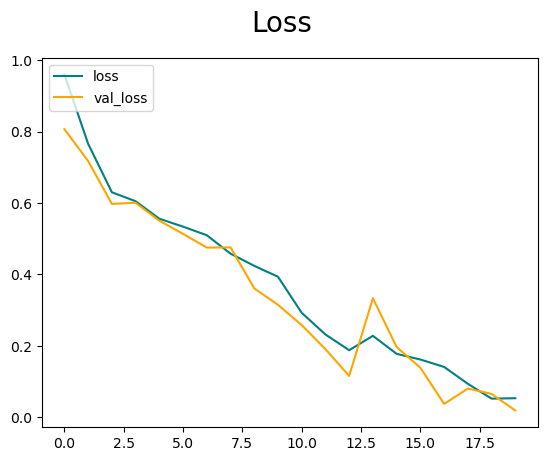

In [198]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [200]:
# Visualising the Accuracy

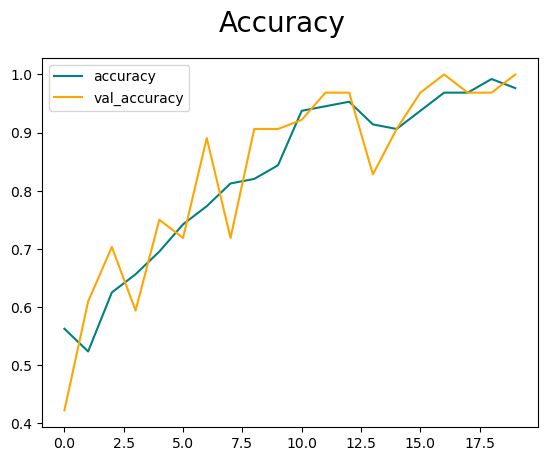

In [201]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [202]:
# Evaluating the Model

In [203]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [205]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [207]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state( y, yhat)
    recall.update_state( y, yhat)
    accuracy.update_state( y, yhat)

2023-08-16 00:46:20.975677: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:46:20.976514: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-08-16 00:46:23.371848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 929ms/step


In [210]:
print(f'Precision: {precision.result()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [211]:
# Testing the Data

In [273]:
import cv2

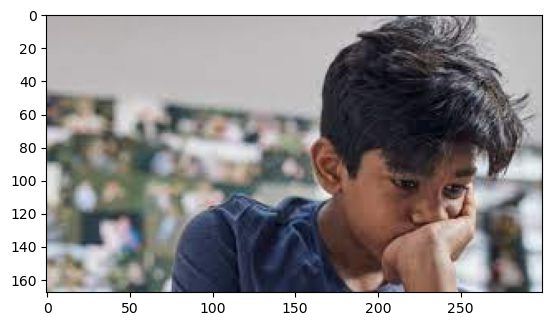

In [295]:
img = cv2.imread('sadPeople.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

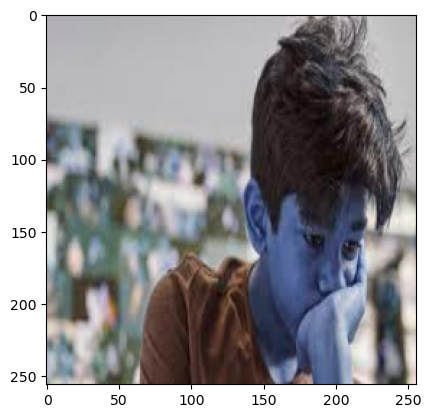

In [296]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [297]:
resize.shape

TensorShape([256, 256, 3])

In [298]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [299]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [300]:
yhat

array([[0.9036747]], dtype=float32)

In [301]:
if yhat > 0.9:
    print(f'The Data is Sad')
else:
    print(f'The Data is Happy')

The Data is Sad


In [264]:
# Saving the Model

In [302]:
from tensorflow.keras.models import load_model

In [303]:
model.save(os.path.join('models','ImageClassifier.h5'))

/Users/shounak/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [306]:
new_Model = load_model(os.path.join('models', 'ImageClassifier.h5'))

In [307]:
new_Model

In [308]:
yhatnew = new_Model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 193ms/step


2023-08-16 01:26:36.673501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [309]:
if yhat > 0.9:
    print(f'The Data is Sad')
else:
    print(f'The Data is Happy')

The Data is Sad
